In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Vectos Spaces.

A set of functions form a vector space if they obey the general definition of vector space.  
To see that any set of vectors form a vector space, you can just check if the set has the following properties: http://mathworld.wolfram.com/VectorSpace.html.  

The idea of a vector is far more general than the picture of a line with an arrowhead attached to its end.  That special case is an important one, but it doesn’t tell the whole story. The short answer is:  

**A vector is an element of a vector space.**

Roughly  speaking,  a  vector  space  is  some  *set*  of  things  for  which  the  operation  of  addition  is defined and the operation of multiplication by a scalar is defined.  You don’t necessarily have to be able to multiply two vectors by each other or even to be able to define the length of a vector, though those are very  useful  operations.  You  can  add  two  cubic polynomials together: $(2 - 3x + 4x^{2} - 7x^{3}) + (8 - 2x + 11^{2} + 9x^{3})$ resulting in a cubic polynomial.  You can multiply such a polynomial by 17 and it’s still a cubic polynomial.  The set of all cubic polynomials in x
forms a vector space and the vectors are the individual cubic polynomials.  

For example, we can add two sine functions.

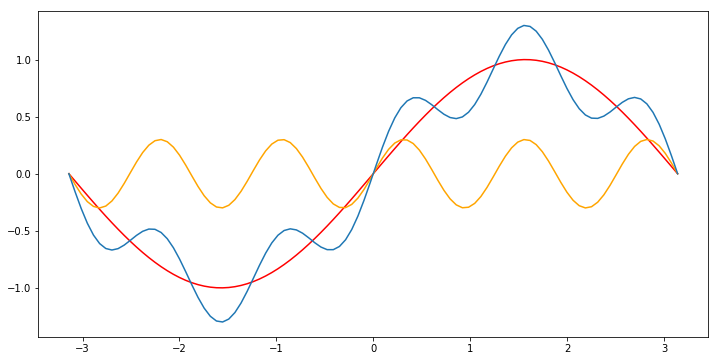

In [2]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = 0.3 * np.sin(5*x)
y1_2 = y1 + y2
plt.figure(figsize=(12,6))
plt.plot(x, y1, color='red')
plt.plot(x, y2, color='orange')
plt.plot(x, y1_2)

To measure and compare vectors we can use the inner, or dot, product.

In [3]:
v = np.array([2,1])
s = np.array([-3,2])
d = v @ s # or v.dot(s)
print (d)

-4


Note that the inner product is zero when the vectors are orthogonal (i.e., at right angles with each other). When this is the case, we say that the vectors are maximally different.

In [4]:
v = np.array([3,0])
s = np.array([0, -2])
d = v @ s
print (d)

0


The self inner product (norm) is  good measure for the size of a vector.

In [5]:
v = np.array([3,1])
d = v @ v
print (d)

10


### The Cosine Rule
An useful property of vector dot product multiplication is that we can use it to calculate the cosine of the angle between two vectors. We could write the dot products as:

$$ \vec{v} \cdot \vec{s} = \|\vec{v} \|\|\vec{s}\| \cos (\theta) $$ 

Which we can rearrange as:

$$ \cos(\theta) = \frac{\vec{v} \cdot \vec{s}}{\|\vec{v} \|\|\vec{s}\|} $$
Here's that calculation in Python:

In [6]:
v = np.array([2,1])
s = np.array([-3,2])

v_mag = np.linalg.norm(v)
s_mag = np.linalg.norm(s)

cos = (v @ s) / (v_mag * s_mag)

# so theta (in degrees) is:
theta = np.rad2deg(np.arccos(cos))

print(theta)

119.744881297


## Inner product in $L_{2}[-1, 1]$.

When the vectors have equal norm, the inner product will be a good measure of the similarity between these vectors.

The inner product of $sin(x)$ is the integral of $sin^{2}(x)$ over the interval $[-\pi, \pi]$ which yields 1. The integral for y = x over the same interval is equal to $\frac{2}{3}$. When we take the inner product between $sin(x)$ and the linear function $\sqrt\frac{3}{2}x$, the result is aproximately 0.78 (area under the red curve). Note that we are comparing unit norm vectors where maximum similarity is equal to 1 and maximum *dis*similarity is equal to 0, i.e., when the two components are orthogonal.  

Thus, the sine function and the linear ramp are pretty close with respect to similarity.

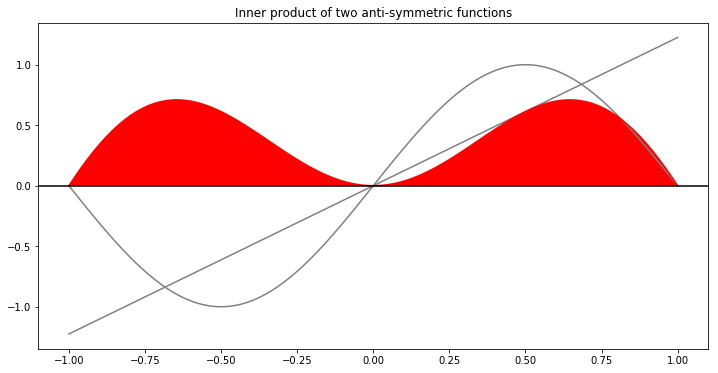

In [7]:
x = np.linspace(-1, 1, 100)
y1 = np.sin(np.pi * x)
y2 = np.sqrt(3/2) * x
y3 = np.multiply(y1, y2)

plt.figure(figsize=(12,6))
plt.title('Inner product of two anti-symmetric functions')
plt.plot(x, y1, color='gray')
plt.plot(x, y2, color='gray')
plt.plot(x, y3, color='red')
plt.fill_between(x, 0, y3, facecolor='red')
plt.axhline(y=0.0, color='black', linestyle='-')

The inner product of an antisymmetric function (sin(x)) and a symmetric function (1 - abs(x)) is zero.

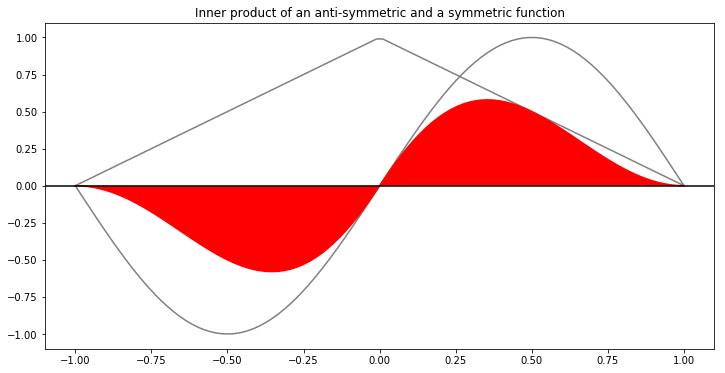

In [8]:
x = np.linspace(-1, 1, 100)
y1 = np.sin(np.pi * x)
y2 = 1 - np.abs(x)
y3 = np.multiply(y1, y2)

plt.figure(figsize=(12,6))
plt.title('Inner product of an anti-symmetric and a symmetric function')
plt.plot(x, y1, color='gray')
plt.plot(x, y2, color='gray')
plt.plot(x, y3, color='red')
plt.fill_between(x, 0, y3, facecolor='red')
plt.axhline(y=0.0, color='black', linestyle='-')

For the two sinusoids shown below, the total area under the red curve equals zero.

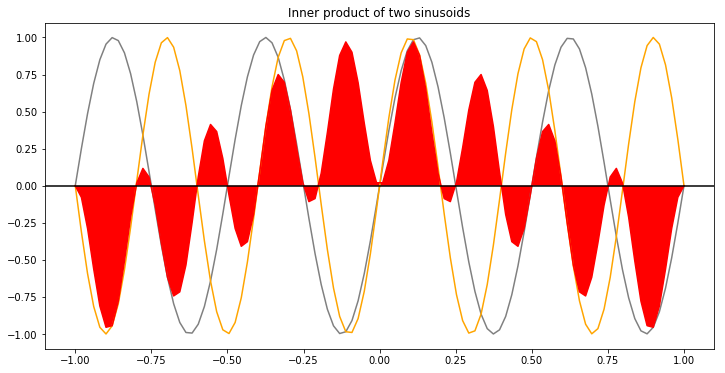

In [9]:
x = np.linspace(-1, 1, 100)
y1 = np.sin(4 * np.pi * x) # gray
y2 = np.sin(5 * np.pi * x) # orange
y3 = np.multiply(y1, y2)

plt.figure(figsize=(12,6))
plt.title('Inner product of two sinusoids')
plt.plot(x, y1, color='gray')
plt.plot(x, y2, color='orange')
plt.plot(x, y3, color='red')
plt.fill_between(x, 0, y3, facecolor='red')
plt.axhline(y=0.0, color='black', linestyle='-')

The norm is a quantitative measure of the distance between the function vectors.

We can also calculate the distance as $||x - y||^{2}$, known as the mean square error which, in the case below is represented by the area under the red curve and is equal to 2.

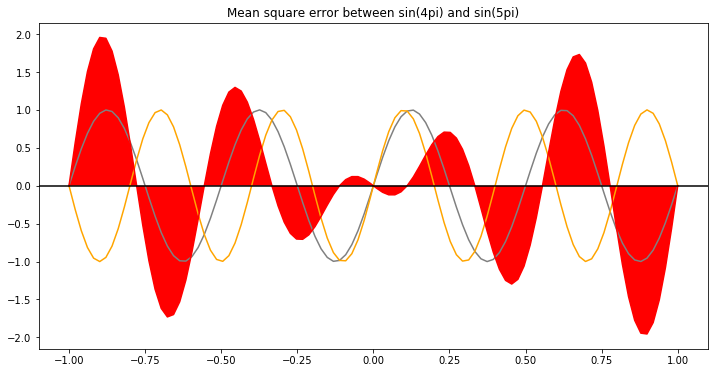

In [10]:
x = np.linspace(-1, 1, 100)
y1 = np.sin(4 * np.pi * x) # gray
y2 = np.sin(5 * np.pi * x) # orange
y3 = y1 - y2

plt.figure(figsize=(12,6))
plt.title('Mean square error between sin(4pi) and sin(5pi)')
plt.plot(x, y1, color='gray')
plt.plot(x, y2, color='orange')
plt.plot(x, y3, color='red')
plt.fill_between(x, 0, y3, facecolor='red')
plt.axhline(y=0.0, color='black', linestyle='-')

When a vector space equipped with an inner product is also complete, we call the vector space a Hilbert space (https://en.wikipedia.org/wiki/Hilbert_space). 

## Bases.

The axioms of a vector space tell us how to combine vectors together. A linear combination of vectors is the basic operation that we perform in vector spaces. We take two or more vectors x and y, we re-scale them by scalar multiplication and then we combine them together by a vector addition.  

Can we find a minimal set of vectors so that we can express any vector in the space as a linear combination of these so-called bases? For example $e_{0} = [1, 0]$ and $e_{1} = [0, 1]$ are the bases for $\\R^{2}$

Vector from scaled unit vectors: [2 4]


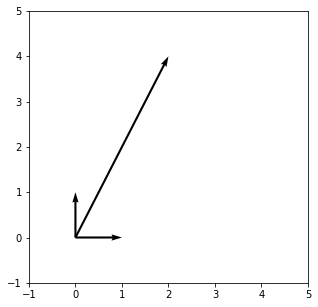

In [11]:
i = np.array([1, 0]) # unit vector along the x-axis
j = np.array([0,1]) # unit vector along the y-axis
r = (2 * i) + (4 * j)
print("Vector from scaled unit vectors:", r)

vectors = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 2, 4]])
X, Y, U, V = zip(*vectors)
plt.figure(figsize=(5,5))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])
plt.draw()

However, there are other basis that we could choose for the Euclidean plane. For instance, the basis given by the vectors [1, 0] and [1, 1] also represents a basis for the plane. Any vector of coordinates x0 and x1, can be expressed as a linear combination of v0 and v1.

Vector from scaled unit vectors: [2 4]


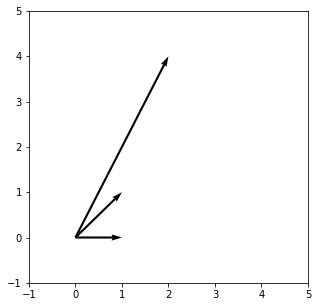

In [12]:
i = np.array([1,0]) # unit vector along the x-axis
j = np.array([1,1]) # unit vector along the y-axis
r = np.array([2,2]) @ np.array([[1, 1],
                                [0, 1]])
print("Vector from scaled unit vectors:", r)

vectors = np.array([[0, 0, 1, 0], [0, 0, 1, 1], [0, 0, 2, 4]])
X, Y, U, V = zip(*vectors)
plt.figure(figsize=(5,5))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])
plt.draw()

This generalizes to higher dimensions.

### Fourier Bases.

A Fourier series is a way to represent a function as the sum of simple sine waves. More formally, it decomposes any periodic function or periodic signal into the sum of a (possibly infinite) set of simple oscillating functions, namely sines and cosines (or, equivalently, complex exponentials). The discrete-time Fourier transform is a periodic function, often defined in terms of a Fourier series.  

The Fourier basis for the interval [-1, 1] is:  

$\frac{1}{\sqrt{2}}$, $cos\pi*t$, $\sin\pi*t$, $cos2\pi*t$, $sin2\pi*t$, $cos3\pi*t$, $sin3\pi*t$, ...

The shape of the Fourier basis converges to the shape of a square wave with an increasing number of terms.

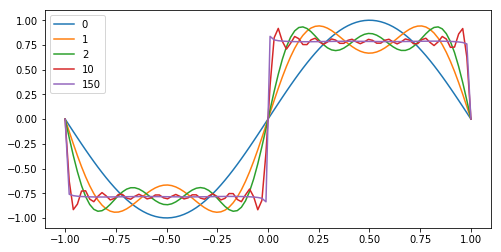

In [13]:
x = np.linspace(-1, 1, 100)

def fourier(x, k):
    y = np.zeros(len(x))
    for i in range(k+1):
        y += (np.sin((2*i+1)*np.pi*x) / (2*i+1))
    return y

plt.figure(figsize=(8,4))
plt.plot(x, fourier(x, 0), label = '0')
plt.plot(x, fourier(x, 1), label = '1')
plt.plot(x, fourier(x, 2), label = '2')
plt.plot(x, fourier(x, 10), label = '10')
plt.plot(x, fourier(x, 150), label = '150')
plt.legend()

### Orthogonal Bases and Changing Basis.

Recall that two vectors which are orthogonal to each other have an inner (dot) product of zero.  If the vectors of an orthogonal basis are normalized, the resulting basis is an orthonormal basis.

Given two basis vectors e1 ([1, 0]) and e2 ([0, 1]), a vector r in the plane of the basis vectors can be specified by a linear combination of e1 and e2. For example, r may have the coordinates [3, 4] which means that it is composed of three times the basis vector e1 and four times the basis vector e2.  

Suppose we do have two other basis vectors, b1 ([2 1]) and b2 ([-2 4]), **which are orthogonal to each other** and can be expressed in terms of the original basis vectors (here e1 and e2), we can express r in terms of the new basis vectors using the dot product.

In [14]:
e1 = np.array([1, 0]); e2 = np.array([0, 1]) # old basis
b1 = np.array([2, 1]); b2 = np.array([-2, 4]) # new basis
r = np.array([3, 4])

def change_frame(e1, e2, b1, b2, r):
    """
    Calculate the components of a vector based on new basis vectors
    """
    # check that the basis vectors are orthogonal to each other
    assert (e1.dot(e2) == 0), "Old basis vectors ar not orthogonal."
    assert (b1.dot(b2) == 0), "New basis vectors are not orthogonal."
    
    # get vector (scalar) projections of r onto b1 and b2
    component_1 = (r.dot(b1) / (b1[0]**2 + b1[1]**2))
    component_2 = (r.dot(b2) / (b2[0]**2 + b2[1]**2))
    assert (np.all(component_1 * b1 + component_2 * b2) == np.all(r)), "Undefined error."
    
    return np.array([component_1, component_2])

res = change_frame(e1, e2, b1, b2, r)
print("The vector in the new (!) basis is:", res)

The vector in the new (!) basis is: [ 2.   0.5]


Matrices can change one set of basis vectors into another set.

In [15]:
mtrx = np.array([[2,3], [10, 1]])
e1 = np.array([1, 0]); e2 = np.array([0, 1]) # old basis
print("New basis vector b1:", mtrx @ e1)
print("New basis vector b2:", mtrx @ e2)

New basis vector b1: [ 2 10]
New basis vector b2: [3 1]


The matrix transforms the input vector which can be viewed as the sum of the trasnformed **basis** vectors which are multiplied with the appropriate scalar component of the input vector.

In [16]:
input_vector = np.array([3, 2])
print("Using the matrix to transform an input vector:", mtrx @ input_vector)

res = input_vector[0] * (mtrx @ e1) + input_vector[1] * (mtrx @ e2)
print("\nTransforming the basis vectors first, then scaling them:", res)

Using the matrix to transform an input vector: [12 32]

Transforming the basis vectors first, then scaling them: [12 32]


Some special transformations.

In [17]:
r = np.array([1, 0]); s = np.array([0, 2])
print("The original basis vectors:", r, "and", s)
mtx = np.array([[-1, 0], [0, 1]])
print("Mirrored on the y-axis:", mtx @ r, mtx @ s)
mtx = np.array([[-1, 0], [0, -1]])
print("Inversion:", mtx @ r, mtx @ s)
mtx = np.array([[0, 1], [1, 0]])
print("Mirrored on y=x:", mtx @ r, mtx @ s)
mtx = np.array([[0, -1], [-1, 0]])
print("Mirrored on y=-x:", mtx @ r, mtx @ s)
mtx = np.array([[0, 1], [1, 1]])
print("Shear parallel to x-axis (positive direction):", mtx @ r, mtx @ s)
theta = 1/4*np.pi
mtx = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
print("Rotation of 1/4 radians:", mtx @ r, mtx @s)

The original basis vectors: [1 0] and [0 2]
Mirrored on the y-axis: [-1  0] [0 2]
Inversion: [-1  0] [ 0 -2]
Mirrored on y=x: [0 1] [2 0]
Mirrored on y=-x: [ 0 -1] [-2  0]
Shear parallel to x-axis (positive direction): [0 1] [2 2]
Rotation of 1/4 radians: [ 0.70710678  0.70710678] [-1.41421356  1.41421356]


Matrix transformations can be combined. The order in which the matrix transformations are applied does matter.

In [18]:
r = np.array([1, 0]); s = np.array([0, 1])
print("The original basis vectors:", r, "and", s)
A1 = np.array([[0, 1], [-1, 0]])
A2 = np.array([[1, 1], [0, 1]])
A1_r_transform = A1 @ r; A1_s_transform = A1 @ s
print("After transformation with A1 only:", A1_r_transform, A1_s_transform)
A2_A1_r = A2 @ A1_r_transform; A2_A1_s = A2 @ A1_s_transform
print("After transformation with A1, then A2:", A2_A1_r, A2_A1_s) # rotate first, then shear
print("After transformation with A2, then A1:", A1 @ (A2 @ r), A1 @ (A2 @ s)) # shear first, then rotate

The original basis vectors: [1 0] and [0 1]
After transformation with A1 only: [ 0 -1] [1 0]
After transformation with A1, then A2: [-1 -1] [1 0]
After transformation with A2, then A1: [ 0 -1] [ 1 -1]


### Gram-Schmidt Process.

Assuming we have a set of linearly independent vectors, the Gram-Schmidt process can be used to construct an orthonormal basis set.

In [19]:
def gsBasis(A) :
    B = np.array(A, dtype=np.float_) # Make B as a copy of A, since we're going to alter it's values.
    # Loop over all vectors, starting with zero, label them with i
    for i in range(B.shape[1]) :
        # Inside that loop, loop over all previous vectors, j, to subtract.
        for j in range(i) :
            # Subtract the overlap with previous vectors.
            B[:, i] = B[:, i] - B[:, i] @ B[:, j] * B[:, j]
        # Perform a normalization test for B[:, i]
        if np.linalg.norm(B[:, i]) > verySmallNumber:
            B[:, i] = B[:, i] / np.linalg.norm(B[:, i])
        else :
            B[:, i] = np.zeros_like(B[:, i])
    return B

# This function uses the Gram-schmidt process to calculate the dimension
# spanned by a list of vectors.
# Since each vector is normalised to one, or is zero,
# the sum of all the norms will be the dimension.
def dimensions(A) :
    return np.sum(np.linalg.norm(gsBasis(A), axis=0))

verySmallNumber = 1e-14

V = np.array([[1,0,2,6],
              [0,1,8,2],
              [2,8,3,1],
              [1,-6,2,3]], dtype=np.float_)

U = gsBasis(V)
print(U)
print("\nRepeating the process should give you the same result:\n")
print(gsBasis(U))
print("\nThe dimensions are:", dimensions(U))

[[ 0.40824829 -0.1814885   0.04982278  0.89325973]
 [ 0.          0.1088931   0.99349591 -0.03328918]
 [ 0.81649658  0.50816781 -0.06462163 -0.26631346]
 [ 0.40824829 -0.83484711  0.07942048 -0.36063281]]

Repeating the process should give you the same result:

[[ 0.40824829 -0.1814885   0.04982278  0.89325973]
 [ 0.          0.1088931   0.99349591 -0.03328918]
 [ 0.81649658  0.50816781 -0.06462163 -0.26631346]
 [ 0.40824829 -0.83484711  0.07942048 -0.36063281]]

The dimensions are: 4.0


In [20]:
# Now let's see what happens when we have one vector that is a linear combination of the others.
C = np.array([[1,0,2],
              [0,1,-3],
              [1,0,2]], dtype=np.float_)
print(gsBasis(C))
print("\nThe dimensions of the original matrix are:\n", dimensions(C))

[[ 0.70710678  0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.70710678  0.          0.        ]]

The dimensions of the original matrix are:
 2.0


### Legendre Polynomials.

An important property of the Legendre polynomials is that they are orthogonal with respect to the $L_{2}$ norm on the interval −1 ≤ x ≤ 1.  

In fact, an alternative derivation of the Legendre polynomials is by carrying out the Gram–Schmidt process on the polynomials {1, x, x2, ...} with respect to this inner product.

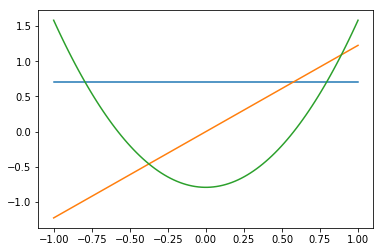

In [21]:
t = np.linspace(-1, 1, 100)

y0 = np.sqrt(1/2) * np.power(t, 0)
y1 = np.sqrt(3/2) * np.power(t, 1)
y2 = np.sqrt(5/8) * (3*np.power(t,2) - 1)

plt.plot(t, y0) # first Legendre polynomial
plt.plot(t, y1) # second Legendre polynomial
plt.plot(t, y2) # third Legendre polynomial

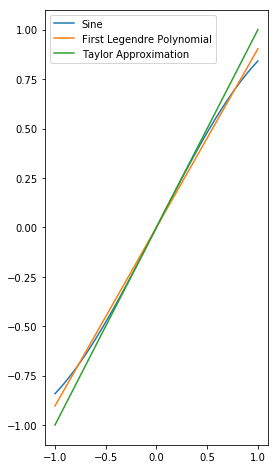

In [22]:
plt.figure(figsize=(4,8))
plt.plot(t, np.sin(t), label='Sine')
plt.plot(t, (0.9035 * t), label = 'First Legendre Polynomial')
plt.plot(t, t, label='Taylor Approximation')
plt.legend()